In [2]:
import numpy as np, matplotlib.pyplot as plt, matplotlib.animation as animation
from matplotlib import style 

In [3]:
style.use('classic')

In [ ]:
fig = plt.figure() 
ax1 = fig.add_subplot(1,1,1) 
def animate(interval): 
    ax1.clear() #isn't computationally heavy since the rendering is 
    x = np.linspace(0,10,10) + np.random.uniform(10)
    y = np.linspace(0,10,10) + np.random.uniform(10)
    ax1.plot(x,y)
ani = animation.FuncAnimation(fig, animate, interval=10)
plt.show()

In [ ]:
np.random.uniform?

In [4]:
import matplotlib.pyplot as plt, numpy as np

In [5]:
from matplotlib.animation import FuncAnimation
from IPython import display

In [ ]:
output = plt.plot([])
plt.close()
print(output)

In [ ]:
x = np.linspace(0,2*np.pi,100)

fig = plt.figure()#FA needs to know the figure it is animating
lines = plt.plot([])
line = lines[0] 

# line, = plt.plot([])

#other setup : xlim,ylim,background 
plt.xlim(0,np.pi*2)
plt.ylim(-1.1,1.1)

def animate(frame):
    #update plot
    y = np.sin(x + 2*np.pi*frame/100)
    line.set_data((x,y))
    pass
ani = FuncAnimation(fig, animate, frames=100, interval = 20)
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [57]:
fig = plt.figure()

# lines = plt.plot([], 'o')
# line = lines[0]
ax = plt.axes(xlim=(-1.1,1.1), ylim=(-1.1,1.1))
# points, = ax.plot([1,2], [3,4], marker='o', ls="" )  # for points
# line,   = ax.plot([2,1], [4,3], marker="" , ls="-")  # for lines
qv = ax.quiver(1,1,1,1,scale=100)
# plt.xlim(-1.1,1.1)
# plt.ylim(-1.1,1.1)

def animate(frame):
    x = np.cos(2*np.pi*frame/100)
    y = np.sin(2*np.pi*frame/100)
#     line.set_data([x,y])
    qv.set_offsets([x,y])
    qv.set_UVC(x,y)
    return qv
    
ani = FuncAnimation(fig, animate, frames=100, interval=50)
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [6]:
import numpy as np, matplotlib.pyplot as plt, time 

def grid_no(x,y,L,rad):
    #Given the coordinates of the particle we can find the grid where the particle is
    if y//1.0 == y or x//1.0 == x:
        return(int(y-1)*int(L/rad)+int(x-1))
    else: 
        return(int(y)*int(L/rad)+int(x))
grid = np.vectorize(grid_no)

def nbr_grid(grid_id,L,rad):
    fake_x = grid_id%(L/rad) + 0.5
    fake_y = grid_id//(L/rad) + 0.5
    nbr_g = []
    for i in [-1,0,1]:
        for j in [-1,0,1]:
            nbr_g.append((grid_no(np.mod(fake_x+i,L),np.mod(fake_y+j,L),L,rad)))
    return nbr_g

def dist(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

def is_neighbour(x1,y1,x2,y2,rad):
    return dist(x1,y1,x2,y2) < rad #and dist(x1,y1,x2,y2) != 0

def add_to_dict(dic,key,val):
    if key in dic:
        dic[key] += [val]
    else: 
        dic[key] = [val]

def nbr_avg(p1, nbr_part):
    #if p1 in nbr_part:
    return np.mean(nbr_part[p1])
    #else: 
        #return theta_p1

def potn(dist, pw=6):
    return 1.0/dist**pw
potn = np.vectorize(potn)
def ror(cutoff=1+1e-2): #Cutoff threshold for radius of repulsion
    return cutoff**(-1.0/6.0)
# ror_val = ror()
ror_val = 0.25

def force(dist, pw=6):
    return -1*(-pw/dist**(pw-1))
force = np.vectorize(force)

def is_rep_nbr(x1,y1,x2,y2,ror_val):
    return dist(x1,y1,x2,y2) < ror_val and dist(x1,y1,x2,y2) != 0.0



def net_effect(p1, nbr_rep_part, theta_net, v_0):#returns theta_final
    f_x, f_y = 0.0, 0.0 
    if p1 in nbr_rep_part:
        for (dist, theta) in nbr_rep_part[p1]:
            f_x += force(dist)*np.cos(theta)
            f_y += force(dist)*np.sin(theta)
        return np.arctan((f_y/v_0 + np.sin(theta_net))/(f_x/v_0 + np.cos(theta_net)))
    else:
        return theta_net
#     return theta_net
# print(net_effect(0, nbr_rep_par, theta_net, v_0))



# def rto_v_r(p1, nbr_rep_part, v_0):
#     f_x, f_y = 0.0, 0.0
#     for (dist, theta) in nbr_rep_part[p1]:
#         f_x += force(dist)*np.cos(theta)
#         f_y += force(dist)*np.sin(theta)
#     return 1.0/np.sqrt((f_x/v_0)**2 + (f_y/v_0)**2 )
print(ror_val)

0.25


In [9]:
import time

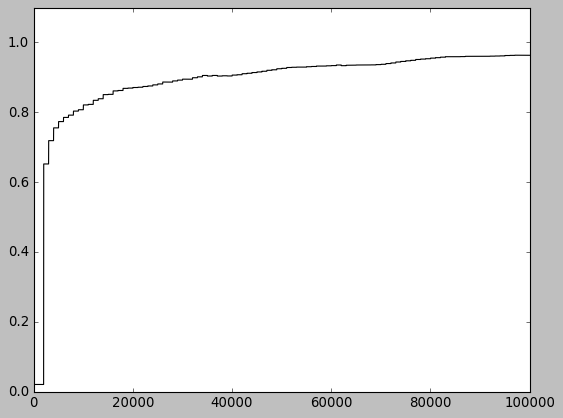

In [85]:
# start_time = time.time()
L = 10 #int(L)
N = 1000 #int(rho*L**2)
rad = 0.5
n_grids = int((float(L)/rad)**2)
time = 100
dt = 1
eta = 0.3
v_0 = 0.1 

nbr_grids = [nbr_grid(i,L,rad) for i in range(n_grids)]#for each grids it returns the list of grids which are its neighbours including itself. 

fig = plt.figure()
# line = plt.plot([], ".")[0]
# plt.xlim(0,L)
# plt.ylim(0,L)
ax = plt.axes(xlim=(0,L), ylim=(0,L))
plt.title('L = '+str(L)+' N = '+str(N)+' rad = '+str(rad)+' ror_val = '
          +str(ror_val)+r' $\eta$ = '+str(eta)+r' $V_0 = $'+str(v_0), fontsize=15)

x = np.zeros((time,N))#Creates a list of x positions with rows as time and columns as each particle
x[0,:] = np.random.uniform(0,L,N)#Intialize the 0th time step 

y = np.zeros((time,N))#similarly for y
y[0,:] = np.random.uniform(0,L,N)

theta = np.zeros((time,N))#similarly for theta 
theta[0,:] = np.random.uniform(-np.pi,np.pi,N)

qv = ax.quiver(x[0,:],y[0,:],np.cos(theta[0,:]),np.sin(theta[0,:]),scale=70)

v_as_true = [np.mean(theta[0,:])]

def animate(t):#for each time step
    qv.set_offsets([(x[t,i], y[t,i]) for i in range(N)])
    qv.set_UVC(np.cos(theta[t,:]), np.sin(theta[t,:]))
#     line.set_data((x[t,:],y[t,:]))
    grids = grid(x[t,:],y[t,:],L,rad)
    dic_grids = {}#keys are grids and particles are values --> for each grid how many particles it contains. 
    for ind,el in enumerate(grids):
        add_to_dict(dic_grids, el, ind)
    nbr_part = {}#keys are particles and values are tuples of its neighbours and their angles.
    nbr_rep_part = {}#keys are particles and values are tuples of its neighbours and their positions. 
    for grid_id in dic_grids:#for a certain grid 
        for p1 in dic_grids[grid_id]:#a particle in that grid
#             if grid_id in nbr_grids:
                for grd in nbr_grids[grid_id]:#a neighbour of our above grid
                    if grd in dic_grids:
                        for p2 in dic_grids[grd]:#a particle in the neighbour grid
                            if is_neighbour(x[t,p1],y[t,p1],x[t,p2],y[t,p2],rad):#if it is the neighbour of our particle
                                add_to_dict(nbr_part,p1,theta[t,p2])#then add the particle and its theta to the list of values for our above particle
                            else:
                                None 
                            if is_rep_nbr(x[t,p1],y[t,p1],x[t,p2],y[t,p2],ror_val):#if it is the repulsive neighbour of our particle
                                add_to_dict(nbr_rep_part,p1,(dist(x[t,p1],y[t,p1],x[t,p2],y[t,p2]),theta[t,p2]))#create an appropriate dictionary
                            else:
                                None 

#     ratio[i] = rto_v_r(0, nbr_rep_part, v_0)
    for p in range(N): # for each particle 
        theta_fnet = nbr_avg(p, nbr_part) + np.random.uniform(-eta,eta) # theta from local interactions
        theta_f = net_effect(p, nbr_rep_part, theta_fnet, v_0) # final theta from local and repulsive interactions
        theta[t+1,p] = theta_f
        x[t+1,p] = x[t,p] + v_0*dt*np.cos(theta[t+1,p])
        x[t+1,p] = np.mod(x[t+1,p],L)
        y[t+1,p] = y[t,p] + v_0*dt*np.sin(theta[t+1,p])
        y[t+1,p] = np.mod(y[t+1,p],L) 
        v_a = np.sqrt(np.mean(np.cos(theta[t,:]))**2 + np.mean(np.sin(theta[t,:]))**2)
        v_as_true.append(v_a)
#     print(v_as_true)
ani = FuncAnimation(fig, animate, frames=time-1, interval=50)
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close() 
plt.plot(v_as_true,'k')
plt.ylim([0,1.1])
plt.show() 
# print(time.time() - start_time) 